# KNN

In [54]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from ml import *

# Wine Quality Dataset

In [55]:
# Prepocess dataset
wineDF = pd.read_csv("./data/winequality-red.csv")

wineDF['label'] = wineDF['quality'].apply(lambda x: 'good' if x > 6 else 'bad')
wineDF.drop('quality', axis = 1)

wine_y = wineDF['label'].values
wine_x = wineDF.drop('label', axis = 1).values

In [56]:
# Standardize dataset
scaler = StandardScaler()
wine_x = scaler.fit_transform(wine_x)

Split 1:

- Metrics:
              precision    recall  f1-score   support

         bad       0.96      0.98      0.97       277
        good       0.85      0.77      0.80        43

    accuracy                           0.95       320
   macro avg       0.91      0.87      0.89       320
weighted avg       0.95      0.95      0.95       320



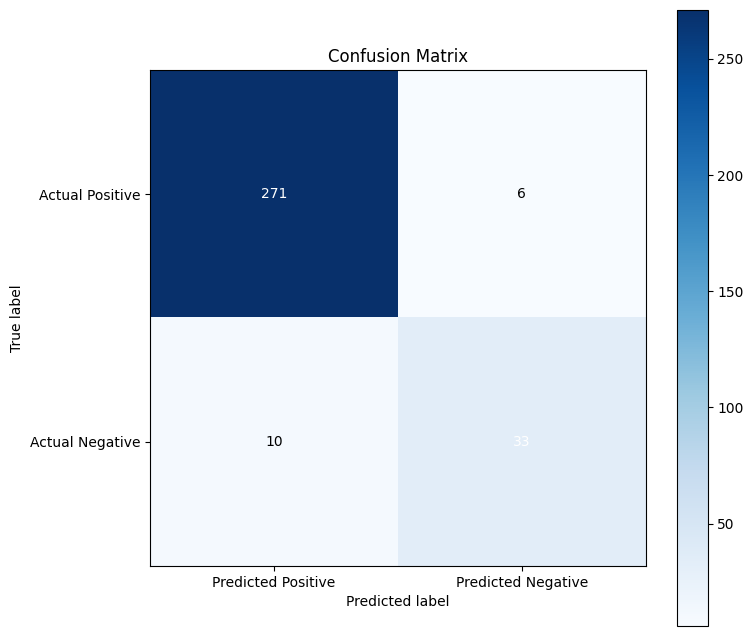

Split 2:

- Metrics:
              precision    recall  f1-score   support

         bad       0.98      0.99      0.99       277
        good       0.93      0.88      0.90        43

    accuracy                           0.97       320
   macro avg       0.95      0.94      0.95       320
weighted avg       0.97      0.97      0.97       320



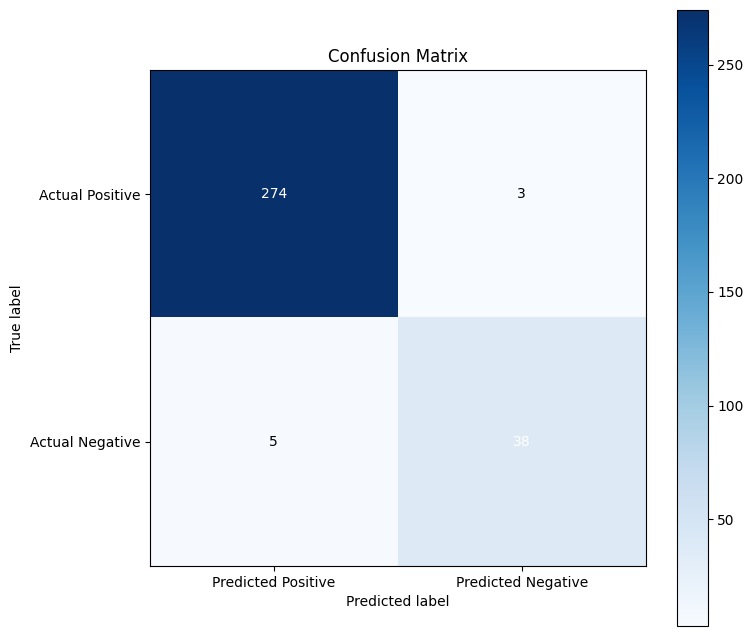

Split 3:

- Metrics:
              precision    recall  f1-score   support

         bad       0.96      0.99      0.98       277
        good       0.92      0.77      0.84        43

    accuracy                           0.96       320
   macro avg       0.94      0.88      0.91       320
weighted avg       0.96      0.96      0.96       320



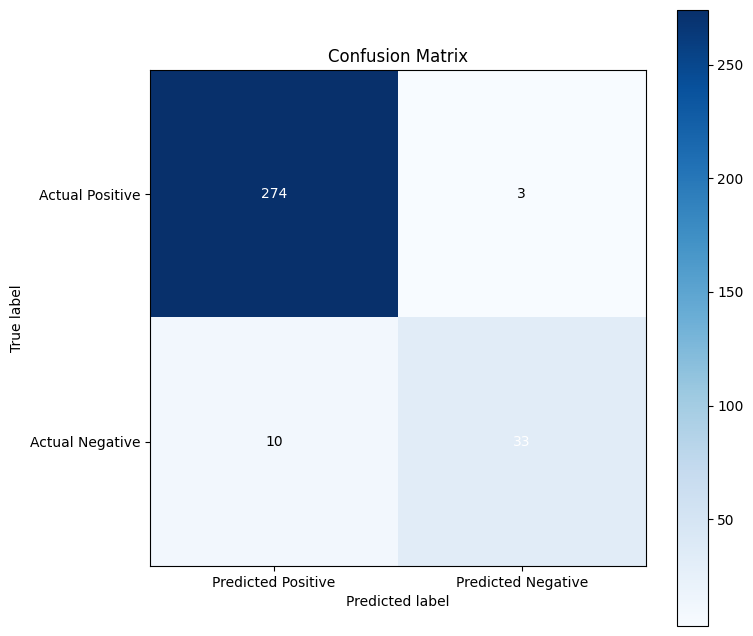

Split 4:

- Metrics:
              precision    recall  f1-score   support

         bad       0.96      0.99      0.98       277
        good       0.94      0.72      0.82        43

    accuracy                           0.96       320
   macro avg       0.95      0.86      0.90       320
weighted avg       0.96      0.96      0.95       320



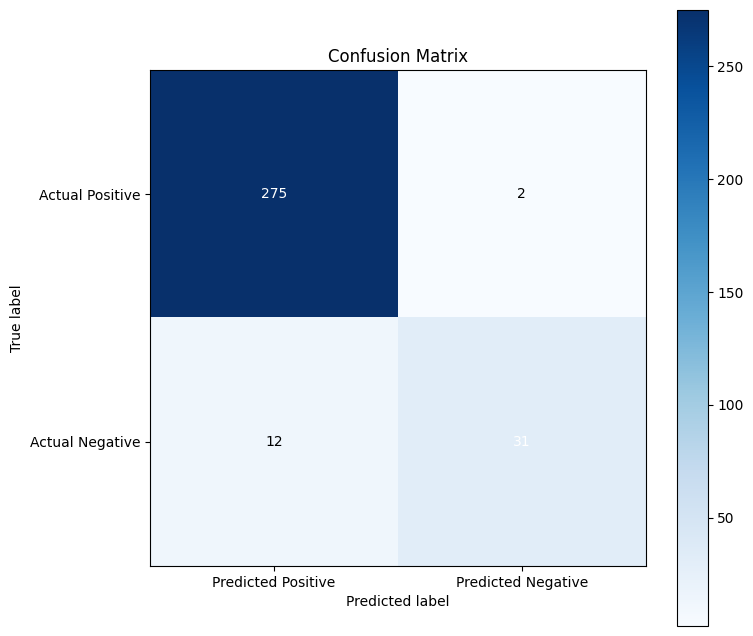

Split 5:

- Metrics:
              precision    recall  f1-score   support

         bad       0.95      0.99      0.97       277
        good       0.93      0.65      0.77        43

    accuracy                           0.95       320
   macro avg       0.94      0.82      0.87       320
weighted avg       0.95      0.95      0.94       320



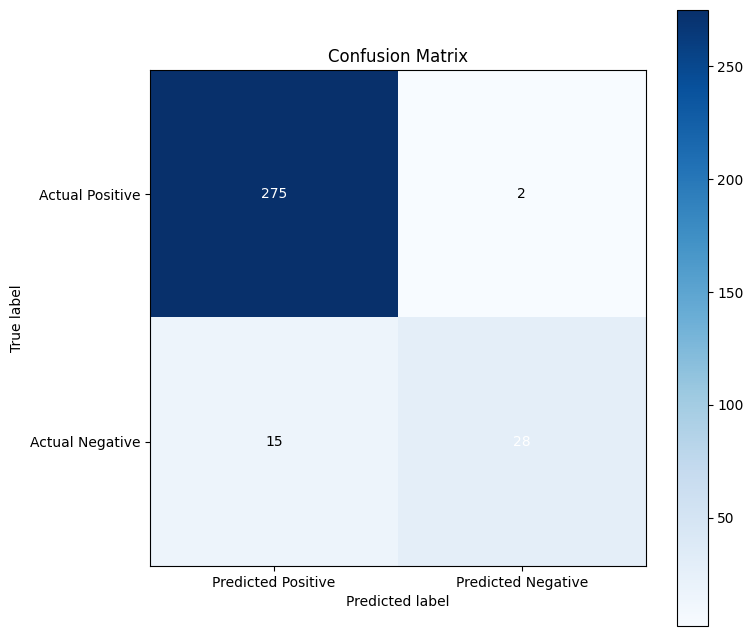


Average metrics:
- Accuracy: 0.958
- Precision: 0.938
- Recall: 0.873
- F1-Score: 0.901


In [57]:
# Cross validate
all_metrics = []

for i in range(5):
    print(f"Split {i + 1}:")

    x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size = 0.2, stratify = wine_y)
    
    model = KNeighborsClassifier(n_neighbors = 5)

    metrics, report, cm = fit_and_predict(model, x_train, x_test, y_train, y_test)
    all_metrics.append(metrics)
    print("\n- Metrics:")
    print(report)
    plot_confusion_matrix(cm, plt.cm.Blues)

print("\nAverage metrics:")
print_avg_metrics(all_metrics)
    

# Heart Disease Dataset

In [58]:
# Preprocess dataset
heartDF = pd.read_csv("./data/heart_statlog_cleveland_hungary_final.csv")

heartDF['target'] = heartDF['target'].apply(lambda x: 'heart disease' if x else 'normal')
heart_y = heartDF['target'].values
heart_x = heartDF.drop('target', axis=1).values

In [59]:
# Standardize dataset
scaler = StandardScaler()
heart_x = scaler.fit_transform(heart_x)

Split 1:

- Metrics:
               precision    recall  f1-score   support

heart disease       0.88      0.85      0.86       126
       normal       0.84      0.87      0.85       112

     accuracy                           0.86       238
    macro avg       0.86      0.86      0.86       238
 weighted avg       0.86      0.86      0.86       238



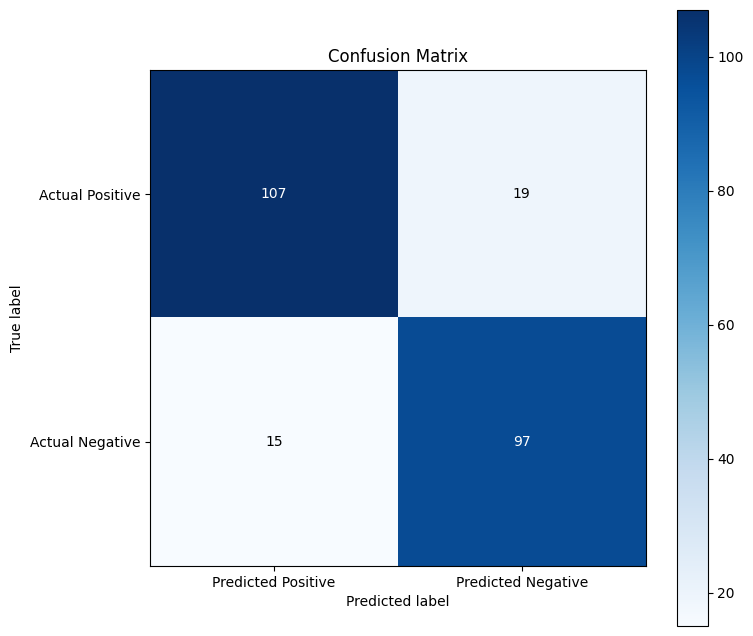

Split 2:

- Metrics:
               precision    recall  f1-score   support

heart disease       0.84      0.86      0.85       126
       normal       0.83      0.81      0.82       112

     accuracy                           0.84       238
    macro avg       0.84      0.83      0.84       238
 weighted avg       0.84      0.84      0.84       238



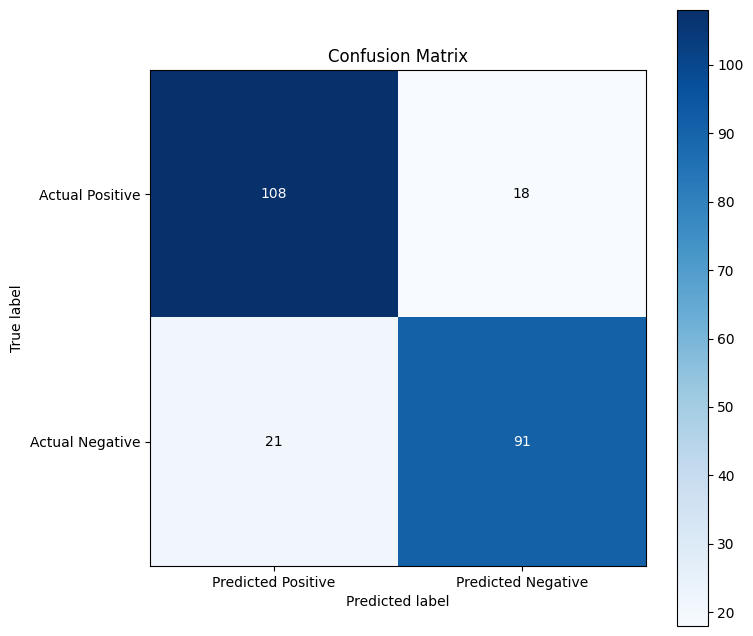

Split 3:

- Metrics:
               precision    recall  f1-score   support

heart disease       0.89      0.88      0.88       126
       normal       0.87      0.88      0.87       112

     accuracy                           0.88       238
    macro avg       0.88      0.88      0.88       238
 weighted avg       0.88      0.88      0.88       238



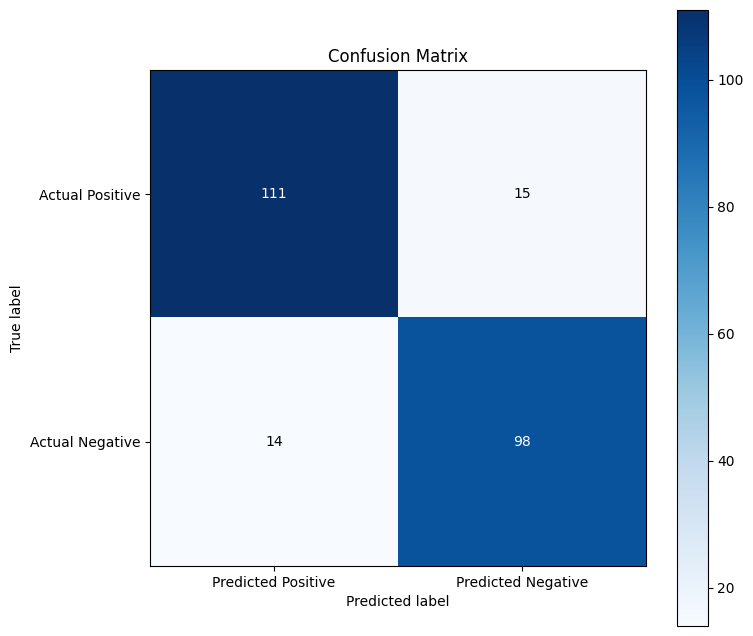

Split 4:

- Metrics:
               precision    recall  f1-score   support

heart disease       0.84      0.89      0.86       126
       normal       0.87      0.81      0.84       112

     accuracy                           0.85       238
    macro avg       0.85      0.85      0.85       238
 weighted avg       0.85      0.85      0.85       238



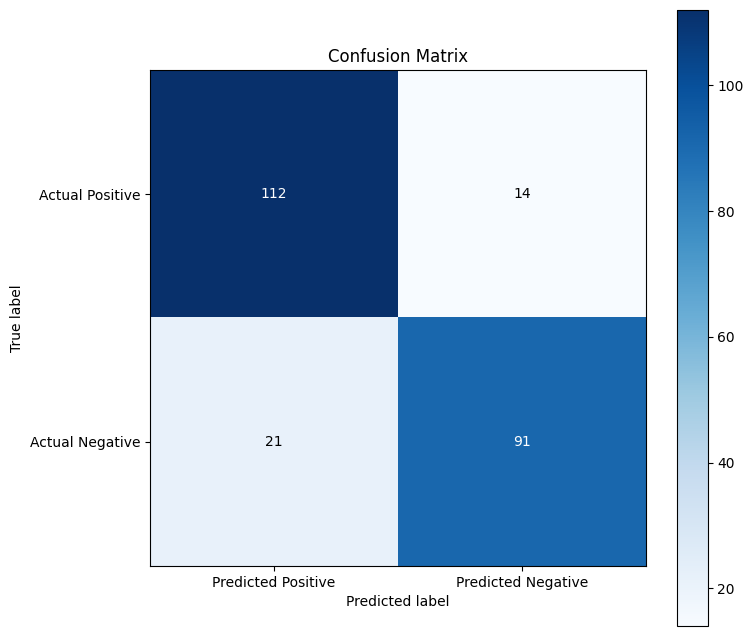

Split 5:

- Metrics:
               precision    recall  f1-score   support

heart disease       0.85      0.83      0.84       126
       normal       0.82      0.84      0.83       112

     accuracy                           0.84       238
    macro avg       0.84      0.84      0.84       238
 weighted avg       0.84      0.84      0.84       238



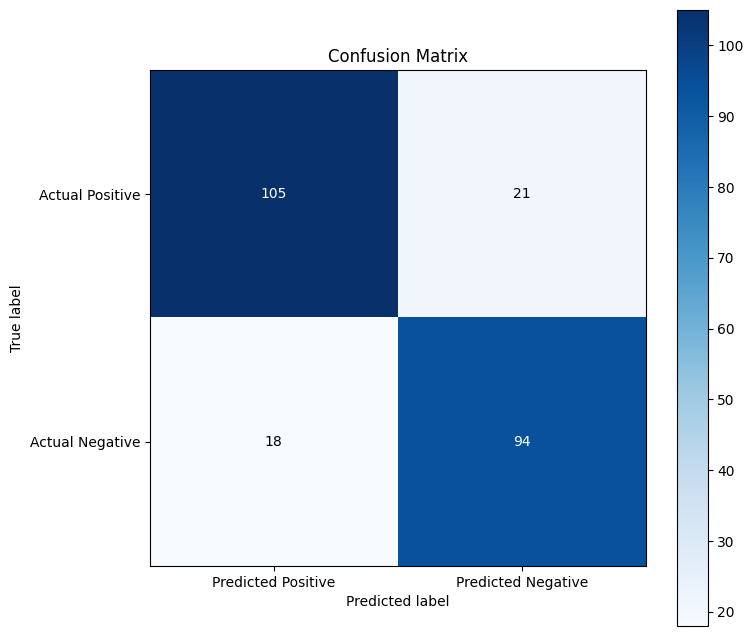


Average metrics:
- Accuracy: 0.852
- Precision: 0.852
- Recall: 0.851
- F1-Score: 0.852


In [60]:
# Cross validate
all_metrics = []

for i in range(5):
    print(f"Split {i + 1}:")

    x_train, x_test, y_train, y_test = train_test_split(heart_x, heart_y, test_size = 0.2, stratify = heart_y)
    
    model = KNeighborsClassifier(n_neighbors = 5)

    metrics, report, cm = fit_and_predict(model, x_train, x_test, y_train, y_test)
    all_metrics.append(metrics)
    print("\n- Metrics:")
    print(report)
    plot_confusion_matrix(cm, plt.cm.Blues)

print("\nAverage metrics:")
print_avg_metrics(all_metrics)